In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from sylvestorch.models import SylvesterNet

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

# Simple random tensors

In [4]:
x = torch.randn((4, 3), device=device)
sylvester = SylvesterNet(10, 3, 3).to(device)

## Training

100%|██████████| 100/100 [00:02<00:00, 42.00it/s]


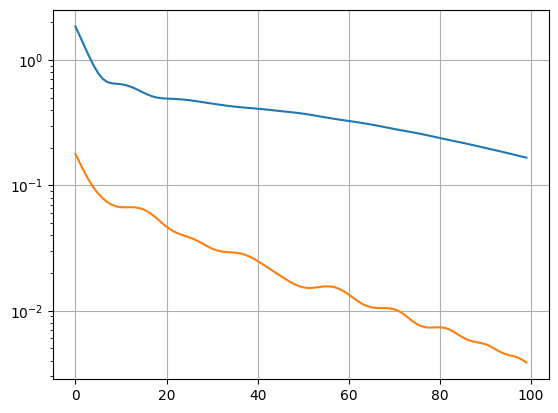

In [5]:
logs = sylvester.fit(x, epochs=100, lr=0.01)
plt.plot(logs['meansquare'])
plt.plot(logs['logdet'])
plt.yscale('log')
plt.grid()
plt.show()

In [6]:
with torch.no_grad():
    y, l = sylvester(x)
print(f"Mean square of input:\t{x.square().mean().item():.6e}")
print(f"Mean square of output:\t{y.square().mean().item():.6e}")
print(f"Mean square of logdet:\t{l.square().mean().item():.6e}")

Mean square of input:	1.136316e+00
Mean square of output:	1.629616e-01
Mean square of logdet:	3.671566e-03


# Inverse

In [7]:
y, _ = sylvester(x)
z, logs = sylvester.inverse(y)

Maximum difference (element-wise) between input and reversed-output:	3.576279e-06


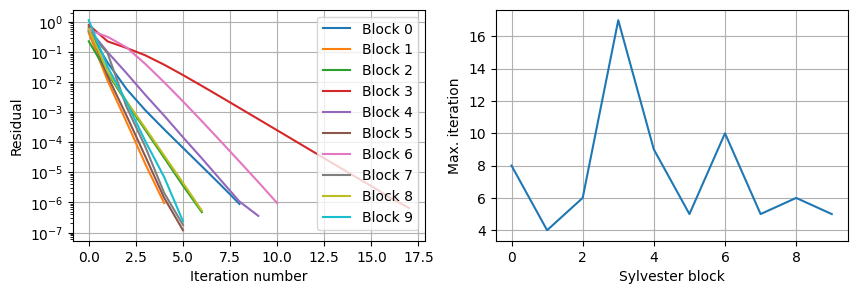

In [8]:
print(f"Maximum difference (element-wise) between input and reversed-output:\t{(z-x).abs().max():.6e}")

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(logs['residual_history'].T)
ax[0].set_yscale('log')
ax[0].set_xlabel('Iteration number')
ax[0].set_ylabel('Residual')
ax[0].legend([f'Block {i}' for i in range(len(sylvester.blocks))])
ax[0].grid()

ax[1].plot(logs['max_iteration_history'])
ax[1].set_xlabel('Sylvester block')
ax[1].set_ylabel('Max. iteration')
ax[1].grid()
plt.show()